#**Performing Other Code-based Statistical Methods**

For the first portion of today's lab we will introduce two basic statistical methods with which you can perform simple anlyses. These include calculating confusion matrix metrics as well as identifying outliers within your datasets.

Afterwards, we will review the skills we have introduced so far creating a mock analysis: from raw data to cleaned data to visualization to statistical calculations. Then finally, you can post the entirety of it online as a GitHub repository.

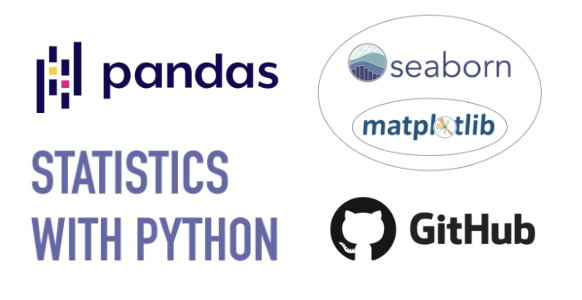

#**Statistical Method 1: Calculating Confusion Matrix Metrics**

We must first begin by importing a tabular dataset in which we can define True Positives and True Negative results using the information it provides. A mock example of this has been prepared below and can be imported as a Pandas DataFrame using the direct link below.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1G7akTW_Av-5ONhOIHwMOqwAwu5e2_DaN')
df

,PatientID,Antigen_Result,PCR_Result,Gold Standard
0,P1,Negative,Negative,Negative
1,P2,Positive,Negative,Negative
2,P3,Negative,Positive,Positive
3,P4,Positive,Positive,Positive
4,P5,Positive,Positive,Negative
5,P6,Negative,Positive,Positive
6,P7,Negative,Negative,Positive
7,P8,Positive,Positive,Positive
8,P9,Positive,Positive,Positive
9,P10,Positive,Positive,Positive


Here, ten patients were tested for SARS-CoV-2 with an Antigen-based test, a PCR-based test, and some theoretical Gold Standard. In the following steps, we will interpret the results of the Gold Standard as True with which we can compare to the other tests.

**If a Gold Standard is not already defined, you must explicitely define it before you can produce a confusion matrix.**

Next, as each row is a patient that can be represented by the value in `PatientID`, let's set that as the index column to better organize our data.

In [ ]:
df.set_index('PatientID')

,Antigen_Result,PCR_Result,Gold Standard
PatientID,,,
P1,Negative,Negative,Negative
P2,Positive,Negative,Negative
P3,Negative,Positive,Positive
P4,Positive,Positive,Positive
P5,Positive,Positive,Negative
P6,Negative,Positive,Positive
P7,Negative,Negative,Positive
P8,Positive,Positive,Positive
P9,Positive,Positive,Positive


Next, let's start by comparing the Antigen Test to the Gold Standard. We can start by creating a conventional confusion matrix like follows:

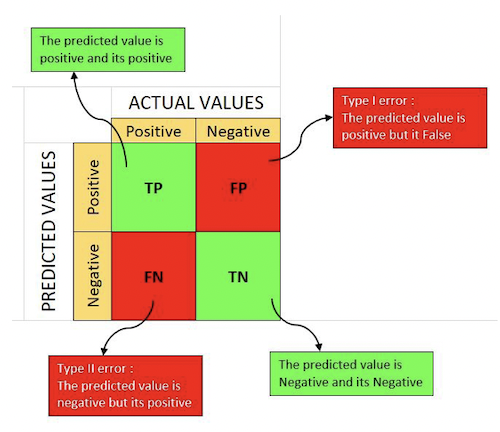

We can create this by converting our two target DataFrame columns into matrix format. Be sure that the vertical column represents Predicted Values (Argument 1) and horizontal one represents Actual Values (Argument 2).

In [ ]:
antigenConfusionMatrix = pd.crosstab(df['Antigen_Result'], df['Gold Standard'])
antigenConfusionMatrix

Gold Standard,Negative,Positive
Antigen_Result,,
Negative,1,3
Positive,2,4


By default, the index and column labels may not be in the conventional order (Positive, then Negative). To fix this, we can specify this order with the `reindex()` function.

In [ ]:
conventionalOrder = ['Positive', 'Negative']
antigenConfusionMatrix = antigenConfusionMatrix.reindex(index=conventionalOrder, columns=conventionalOrder)
antigenConfusionMatrix

Gold Standard,Positive,Negative
Antigen_Result,,
Positive,4,2
Negative,3,1


Next, we can use the following function to calculate confusion matrix metrics.

In [ ]:
def confusionMatrixMetrics(confusionMatrix):
   """
   Calculate and return a Pandas DataFrame with various metrics from a given confusion matrix.

   Args:
    confusionMatrix (pandas.DataFrame): A confusion matrix of actual and predicted outcomes.
   """
   # Save the True/False Positive/Negative values from the input confusion matrix.
   TN = confusionMatrix.iloc[0][0]
   FN = confusionMatrix.iloc[1][0]
   TP = confusionMatrix.iloc[1][1]
   FP = confusionMatrix.iloc[0][1]

   # Calculate various metrics.
   Population = TN+FN+TP+FP
   Prevalence = (TP+FP) / Population
   PPV = TP / (TP+FP)
   NPV = TN / (TN+FN)
   Sensitivity = TP / (TP+FN)
   Specificity = TN / (TN+FP)
   FPR = FP / (TN+FP)
   FNR = FN / (TP+FN)

   # Create a new DataFrame storing to store the metrics.
   df = pd.DataFrame({'Metric':
                      ['TP', 'TN', 'FP', 'FN',
                       'Prevalence', 'PPV', 'NPV',
                       'Sensitivity', 'Specificity',
                       'FPR', 'FNR'],
                      'Value':
                      [TP, TN, FP, FN,
                       Prevalence, PPV, NPV,
                       Sensitivity, Specificity,
                       FPR, FNR]})
   df = df.set_index('Metric')

   return (df)

This function takes a confusion matrix as input.

In [ ]:
confusionMatrixMetrics(antigenConfusionMatrix)

,Value
Metric,
TP,1.000000
TN,4.000000
FP,2.000000
FN,3.000000
Prevalence,0.300000
PPV,0.333333
NPV,0.571429
Sensitivity,0.250000
Specificity,0.666667


Next, we can repeat these steps to calculate confusion matrix metrics for the PCR test results as well.

In [ ]:
pcrConfusionMatrix = pd.crosstab(df['PCR_Result'], df['Gold Standard'], rownames=['Actual'], colnames=['Predicted'])
pcrConfusionMatrix

Predicted,Negative,Positive
Actual,,
Negative,2,1
Positive,1,6


In [ ]:
conventionalOrder = ['Positive', 'Negative']
pcrConfusionMatrix = pcrConfusionMatrix.reindex(index=conventionalOrder, columns=conventionalOrder)
pcrConfusionMatrix

Predicted,Positive,Negative
Actual,,
Positive,6,1
Negative,1,2


In [ ]:
confusionMatrixMetrics(pcrConfusionMatrix)

,Value
Metric,
TP,2.000000
TN,6.000000
FP,1.000000
FN,1.000000
Prevalence,0.300000
PPV,0.666667
NPV,0.857143
Sensitivity,0.666667
Specificity,0.857143


We can now compare the Antigen and PCR tests. Given our data, we can see that our PCR test had greater Sensitivity and Specificity.

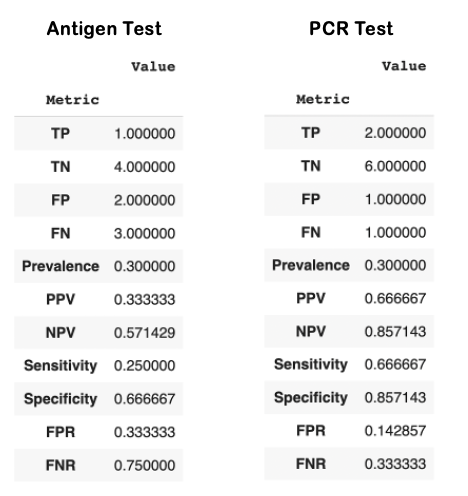

#**Statistical Method 2: Identifying Outliers**

##**The Box-Plot Method**

When working with biological data, it is common to find outliers. How one deals with outliers depends on the context of one's research. For example, outliers may be representative of unique cirumstances of biological interest or instead be indicative of technical artifacts that should be removed during prior to downstream analyses. In the latter case, removal of outliers can be considered another form of Data Cleaning.

The quickest way to identify outliers is with a box plot. These outliers are defined as having values outside of the "minimum" and "maximum" whisker positions. To demonstrate this, we will use another example dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')
df

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not given,0
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not given,0
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not given,0
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,64,1,1,16,1.159,4.2,48.0,1.0,1.0,0,0.0,0.25,1,1,0,1,1,0,Not given,0
5981,62,1,1,20,1.398,4.9,2.0,4.0,1.0,0,0.0,0.25,1,1,0,1,2,1,4.0,0
5982,39,1,1,15,1.500,4.0,3.0,2.0,0.0,0,1.0,0.25,0,0,0,0,0,0,Not given,0
5983,56,1,1,29,1.273,4.3,11.0,1.0,1.0,0,1.0,0.25,1,1,0,1,6,1,1.0,0


One column in this DataFrame is a patient's age. Let us investigate that for outliers.

<Axes: ylabel='AGE'>

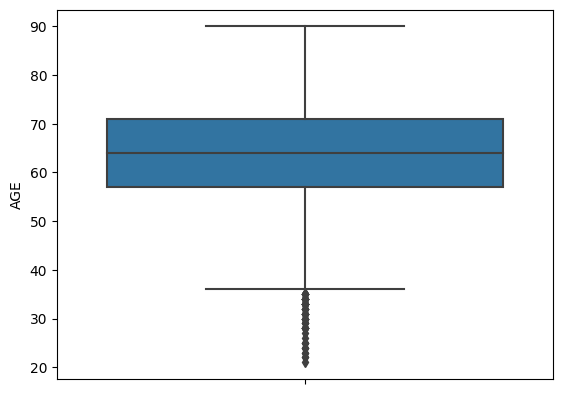

In [ ]:
sns.boxplot(y = df['AGE'])

By convention, box plots display the median of data which can be calculated like this.

In [ ]:
df['AGE'].median()

64.0

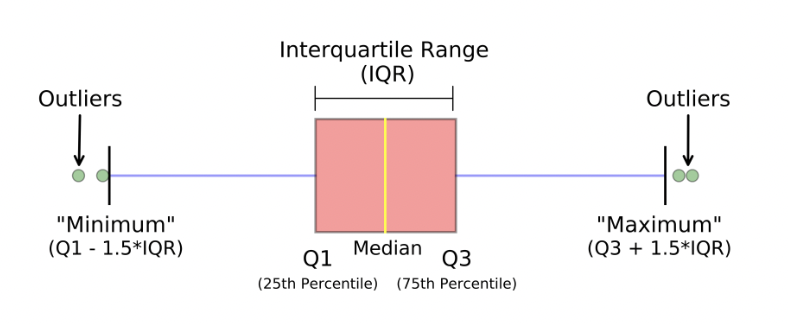

Comparing this graph with the above box plot diagram, we can see the series of dots overlapping into a streak. These are the outliers of this box plot. Note that outliers will not be displayed if the argument `fliersize=0` is passed.

Following this, we can calculate the exact "Minimum" and "Maximum" whisker values shown in this plot by first calculating the first and third quartiles with the DataFrame's built-in `quantile()` function which can calculate any quantile between the values of 0 (the 0th Percentile) and 1 (the 100th Percentile).

In [ ]:
# Calculate the 25th percentile.
qOne = df['AGE'].quantile(0.25)

# Calculate the 75th percentile.
qThree = df['AGE'].quantile(0.75)

print(qOne)
print(qThree)

57.0
71.0


Next, we must calculate the Interquartile Range (IQR) with a function from the stats module of the Scipy library.

In [ ]:
iqr = stats.iqr(df['AGE'])
iqr

14.0

Afterwards, we can obtain the exact "Maximum" and "Minimum" values as follows.

In [ ]:
maximum = qThree + (1.5 * iqr)
maximum

92.0

In [ ]:
minimum = qOne - (1.5 * iqr)
minimum

36.0

Next, we can obtain the exact outlier values with the loc[] function.

In [ ]:
iqrOutliers = df['AGE'].loc[(df['AGE'] < minimum) | (df['AGE'] > maximum)]
iqrOutliers

19      35
56      28
117     34
140     34
167     31
        ..
5680    29
5805    33
5831    28
5912    34
5961    28
Name: AGE, Length: 77, dtype: int64

Here, the first column is the index column and the second one contains the outlier values. In the case that want to remove these, we can use the built-in DataFrame function `drop()` by providing it with the indexes of the rows to delete.

In [ ]:
df['AGE'].drop(iqrOutliers.index)

0       77
1       72
2       74
3       69
4       64
        ..
5980    64
5981    62
5982    39
5983    56
5984    70
Name: AGE, Length: 5908, dtype: int64

##**The Standard Deviation Method**

In addition to this, another simple method of defining outliers is based on the standard deviation of a mean. This is based on the idea that for normally distributed data, 99.7% of the data will be within 3 standard deviations of the mean.

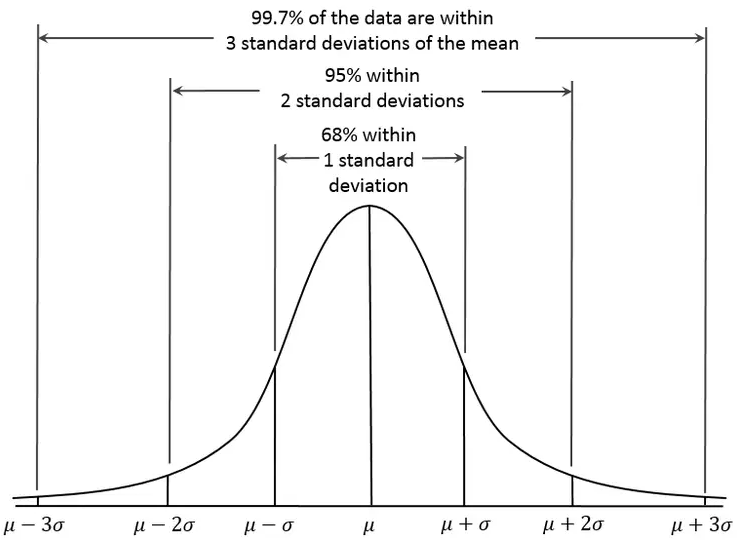

We can confirm whether our data looks near-normally distributed by plotting a histogram.

<Axes: xlabel='AGE', ylabel='Count'>

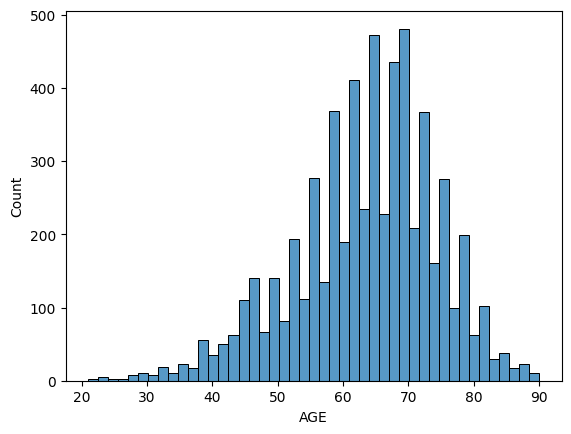

The values of this histogram can be printed as follows:

In [ ]:
df['AGE'].values

array([77, 72, 74, ..., 39, 56, 70])

Additionally, the most frequent value (mode), and minimum and maximum values can also be calculated easily.

In [ ]:
df['AGE'].mode()

0    70
Name: AGE, dtype: int64

In [ ]:
df['AGE'].min()

21

In [ ]:
df['AGE'].max()

90

While there are noticeable differences here, the overall bell curve is present. From here, we can quickly visualize the standard deviation with a bar plot and the argument `ci=sd` (Replace the confidence interval with standard deviation).

<ipython-input-26-d3578c0dde91>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(y = df['AGE'], ci="sd")


<Axes: ylabel='AGE'>

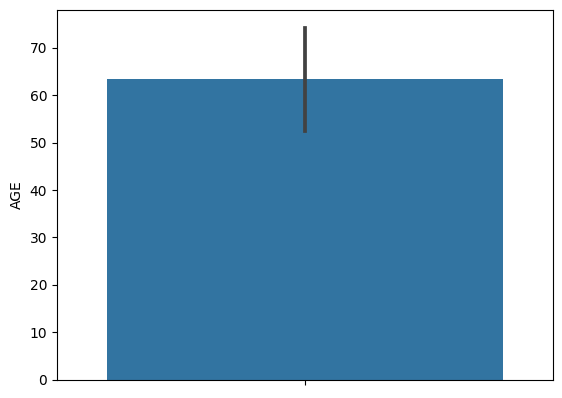

In [ ]:
sns.barplot(y = df['AGE'], ci="sd")

Then to calculate the sample mean (X̄) and sample standard deviation (σ), we can use more built-in DataFrame functions.

In [ ]:
df['AGE'].mean()

63.361069340016705

In [ ]:
df['AGE'].std()

10.91008101896031

With standard deviation, we can also calculate variance.

$$Variance = \sigma^2$$

In [ ]:
df['AGE'].var()

119.02986784027804

Following this, we can calulate how many standard deviations every value is from the sample mean.

In [ ]:
df['stdFromMean'] = (df['AGE'] - df['AGE'].mean()) / df['AGE'].std()
df

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,...,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN,stdFromMean
0,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,...,0.25,1,1,0,1,4,1,1.0,0,1.250122
1,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,...,0.25,1,1,0,1,2,0,Not given,0,0.791830
2,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,...,0.375,1,1,0,1,5,0,Not given,0,0.975147
3,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,...,0.25,1,0,0,1,5,0,Not given,0,0.516855
4,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,...,0.25,0,0,0,0,0,1,2.0,0,0.058563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,64,1,1,16,1.159,4.2,48.0,1.0,1.0,0,...,0.25,1,1,0,1,1,0,Not given,0,0.058563
5981,62,1,1,20,1.398,4.9,2.0,4.0,1.0,0,...,0.25,1,1,0,1,2,1,4.0,0,-0.124753
5982,39,1,1,15,1.500,4.0,3.0,2.0,0.0,0,...,0.25,0,0,0,0,0,0,Not given,0,-2.232895
5983,56,1,1,29,1.273,4.3,11.0,1.0,1.0,0,...,0.25,1,1,0,1,6,1,1.0,0,-0.674703


Using this new column, we can now identify outliers which have values greater than 3 or less than -3.

In [ ]:
stdOutliers = df['AGE'].loc[(df['stdFromMean'] < -3) | (df['stdFromMean'] > 3)]
stdOutliers

56      28
234     28
614     28
812     29
839     22
886     27
954     30
1160    23
1196    30
1298    30
1895    25
1908    22
2286    25
2323    24
2675    30
2734    28
2818    29
2863    25
3041    30
4199    24
4312    30
4607    24
4768    26
5083    21
5380    28
5474    30
5491    23
5669    28
5680    29
5831    28
5961    28
Name: AGE, dtype: int64

Like before, we can also remove these outliers from the DataFrame.

In [ ]:
df['AGE'].drop(stdOutliers.index)

0       77
1       72
2       74
3       69
4       64
        ..
5980    64
5981    62
5982    39
5983    56
5984    70
Name: AGE, Length: 5954, dtype: int64

# **Hands-on Assignment 8: Cumulative Review**

##**Introduction**
By now, you have extensively used the data from the Digitalis Investigation Group (DIG) Trial for learning data cleaning, data manipulation, data visualization, and biostatistics. With the introductions of the above staistical methods, you are ready to publish a complete mock analysis.


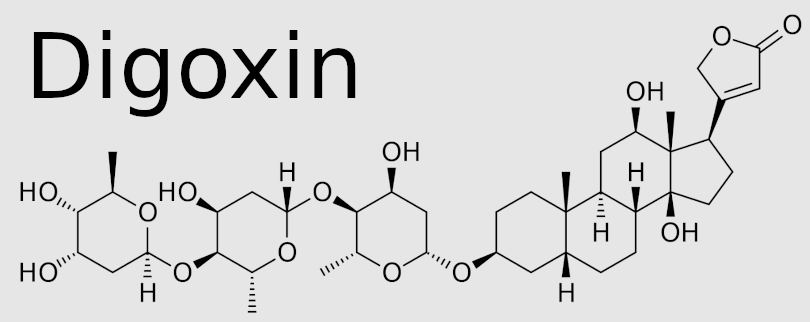

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

In your own Colab notebook, use the concepts presented in the previous assignments to complete a mock analysis of the DIG data. You must start with the uncleaned dataset and perform data cleaning, data visualization, basic biostatistical anlysis, and then publish it on GitHub. You will be graded based whether all four components are present and published in an organized, documented fashion on GitHub that approximately follows this structure below.

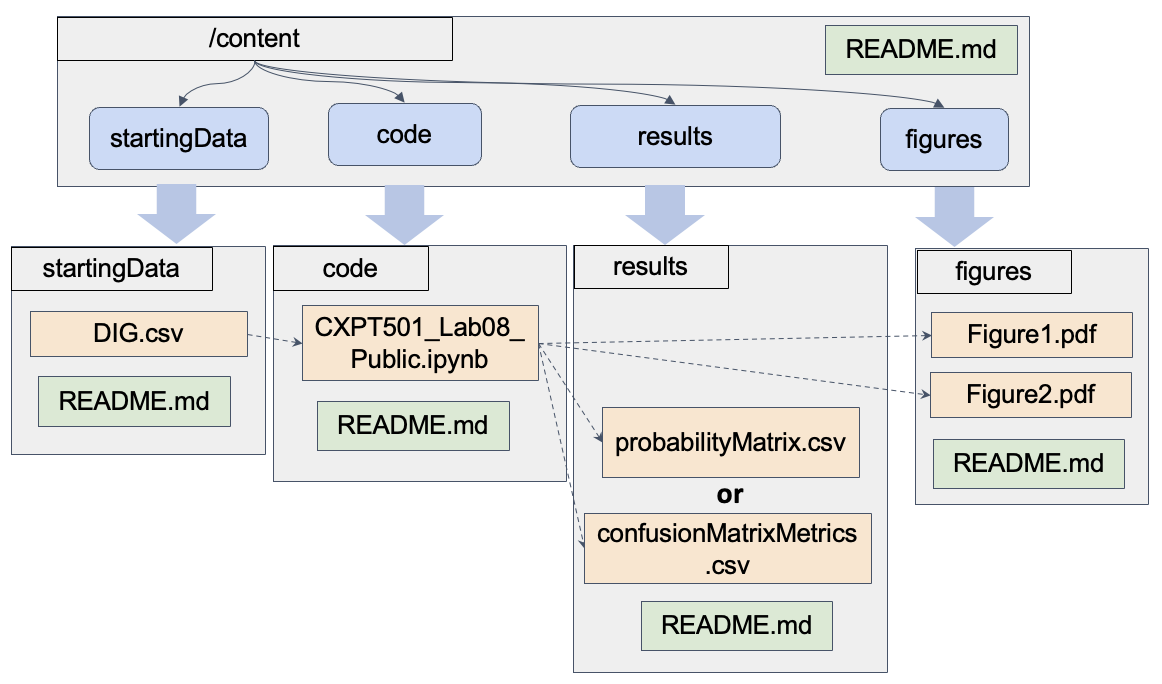

This will be similar to your Final Project in which you will analyze your own dataset with biostatistical methods that will be introduced later in the course.

Thirdly, you **must** include a link to your **public** GitHub repository here:


<font color='red'>Add the link to your GitHub repo here.</font>

##**Steps**

Write the code for your analysis here. You must add comments with text boxes to improve your code's readability.

###**Data Cleaning & Manipulation**

In [ ]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2')
df

,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTH,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS
0,1,0,66,1,1,40,2,0.50,20.073,NaN,...,1,533,1,533,6,0,1438,NaN,1,1379
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,1,880,1,468,4,1,1360,1.0,1,1329
2,3,0,72,1,2,36,1,0.68,25.530,5.1,...,0,1391,1,631,2,0,1391,NaN,1,631
3,4,1,57,1,1,31,1,0.48,25.794,NaN,...,0,1157,0,1157,0,0,1157,NaN,0,1157
4,5,0,74,1,1,15,1,0.53,25.654,4.0,...,1,459,1,191,5,0,1550,NaN,1,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,6796,0,73,1,1,23,1,0.58,28.975,NaN,...,0,546,1,505,1,1,546,1.0,1,546
6796,6797,1,39,1,1,15,1,0.46,22.097,4.0,...,0,1419,0,1419,0,0,1419,NaN,0,1419
6797,6798,1,55,1,1,23,1,0.62,26.221,NaN,...,0,582,1,549,1,1,582,2.0,1,549
6798,6799,1,56,1,1,29,1,0.44,26.651,4.3,...,1,572,1,340,6,1,928,1.0,1,515


In [ ]:
nan_columns = df.isna().any() # Check for NaN values in each column
print(nan_columns[nan_columns == True])# Print columns that contain NaN values

CHESTX      True
BMI         True
KLEVEL      True
CHFDUR      True
RALES       True
ELEVJVP     True
PEDEMA      True
RESTDYS     True
EXERTDYS    True
ACTLIMIT    True
S3          True
PULCONG     True
HEARTRTE    True
DIABP       True
SYSBP       True
FUNCTCLS    True
CHFETIOL    True
PREVMI      True
ANGINA      True
HYPERTEN    True
DIURET      True
KSUPP       True
VASOD       True
DIGDOSE     True
REASON      True
dtype: bool


In [ ]:
cleaned_df = df.dropna() # Remove rows with NaN values
cleaned_df

,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTH,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,1,880,1,468,4,1,1360,1.0,1,1329
11,12,1,56,1,1,23,1,0.50,21.144,4.6,...,0,178,1,178,1,1,178,1.0,1,178
12,13,0,66,1,2,42,1,0.51,32.802,3.8,...,0,267,1,200,1,1,267,1.0,1,200
13,14,0,49,1,1,37,1,0.54,26.469,3.5,...,0,384,0,384,0,1,384,2.0,0,384
14,15,0,74,1,1,39,1,0.56,34.704,4.6,...,0,236,1,172,1,1,236,2.0,0,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,6790,1,71,1,1,27,1,0.57,31.170,5.0,...,0,909,1,783,3,1,909,1.0,1,783
6791,6792,0,66,1,1,5,1,0.60,21.110,4.0,...,0,709,1,494,4,1,709,1.0,1,494
6792,6793,1,63,1,1,15,1,0.58,26.778,4.4,...,0,1048,1,507,3,1,1048,1.0,1,507
6794,6795,0,62,1,1,20,1,0.56,39.060,4.9,...,0,1428,1,137,2,1,1428,4.0,1,137


<Axes: xlabel='BMI', ylabel='Count'>

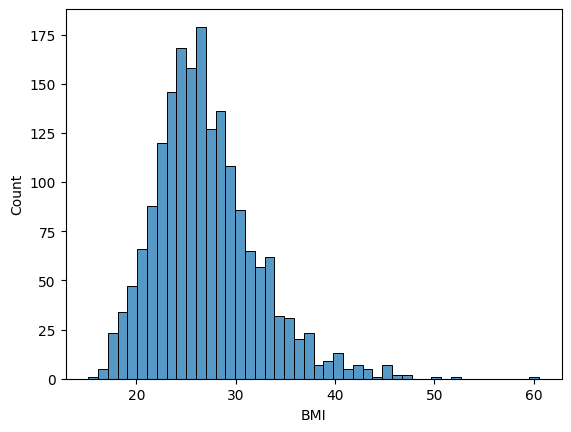

In [ ]:
import seaborn as sns
sns.histplot(cleaned_df['BMI']) #plot a histogram to confirm whether the data looks near-normally distributed

In [ ]:
cleaned_df['BMI'].mode() #calculate mode value

0    25.827
Name: BMI, dtype: float64

In [ ]:
cleaned_df['BMI'].max() #calculate maxiumn value

60.547

In [ ]:
cleaned_df['BMI'].min() #calculate maxiumn value

15.16

<ipython-input-9-2b0f24365b20>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(y = cleaned_df['BMI'], ci="sd") #visualize the standard deviation with a bar plot


<Axes: ylabel='BMI'>

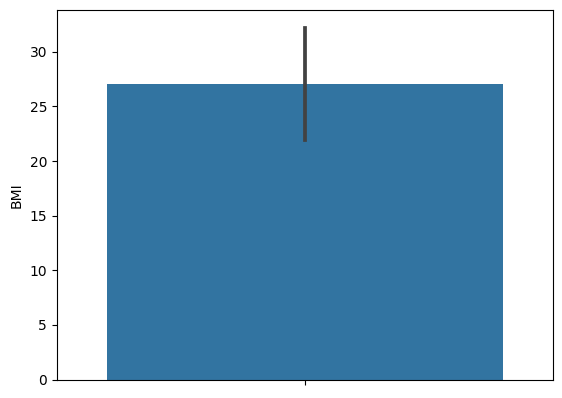

In [ ]:
sns.barplot(y = cleaned_df['BMI'], ci="sd") #visualize the standard deviation with a bar plot

In [ ]:
cleaned_df['BMI'].mean() #calculate sample mean value

27.053002712967984

In [ ]:
cleaned_df['BMI'].std() #calculate standard deviation

5.166875241332345

In [ ]:
cleaned_df['BMI'].var()  #calculate variance

26.69659975949318

In [ ]:
cleaned_df['stdFromMean'] = (cleaned_df['BMI'] - cleaned_df['BMI'].mean()) / cleaned_df['BMI'].std() #calculate z-score
cleaned_df

<ipython-input-13-1a5e714b86d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['stdFromMean'] = (cleaned_df['BMI'] - cleaned_df['BMI'].mean()) / cleaned_df['BMI'].std() #calculate z-score


,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS,stdFromMean
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,880,1,468,4,1,1360,1.0,1,1329,-1.229370
11,12,1,56,1,1,23,1,0.50,21.144,4.6,...,178,1,178,1,1,178,1.0,1,178,-1.143632
12,13,0,66,1,2,42,1,0.51,32.802,3.8,...,267,1,200,1,1,267,1.0,1,200,1.112664
13,14,0,49,1,1,37,1,0.54,26.469,3.5,...,384,0,384,0,1,384,2.0,0,384,-0.113028
14,15,0,74,1,1,39,1,0.56,34.704,4.6,...,236,1,172,1,1,236,2.0,0,236,1.480778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,6790,1,71,1,1,27,1,0.57,31.170,5.0,...,909,1,783,3,1,909,1.0,1,783,0.796806
6791,6792,0,66,1,1,5,1,0.60,21.110,4.0,...,709,1,494,4,1,709,1.0,1,494,-1.150212
6792,6793,1,63,1,1,15,1,0.58,26.778,4.4,...,1048,1,507,3,1,1048,1.0,1,507,-0.053224
6794,6795,0,62,1,1,20,1,0.56,39.060,4.9,...,1428,1,137,2,1,1428,4.0,1,137,2.323841


In [ ]:
stdOutliers = cleaned_df['BMI'].loc[(cleaned_df['stdFromMean'] < -3) | (cleaned_df['stdFromMean'] > 3)] #identify outliers
stdOutliers

357     45.336
620     45.615
1061    45.971
1321    43.269
1329    43.458
1416    47.497
1934    45.525
2398    47.266
2460    46.222
2898    43.763
3061    43.283
3372    44.138
3605    60.547
3650    45.165
4063    42.869
4255    44.870
4642    52.434
5031    45.310
5299    50.633
5680    45.193
Name: BMI, dtype: float64

In [ ]:
cleaned_df['BMI'].drop(stdOutliers.index) #remove outliers

1       20.701
11      21.144
12      32.802
13      26.469
14      34.704
         ...  
6789    31.170
6791    21.110
6792    26.778
6794    39.060
6798    26.651
Name: BMI, Length: 1823, dtype: float64

In [ ]:
cleaned_df = cleaned_df.drop(stdOutliers.index)

###**Data Visualization**

<ipython-input-17-fa6f57dba67f>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=cleaned_df, x='DIGDOSE', y='NHOSP', order=['0.0', '0.125', '0.25', '0.375', '0.5'], palette='colorblind', alpha=0.5, legend=False) #create a strip plot using a colorblind-friendly palette, better transparency for visibility and no legend


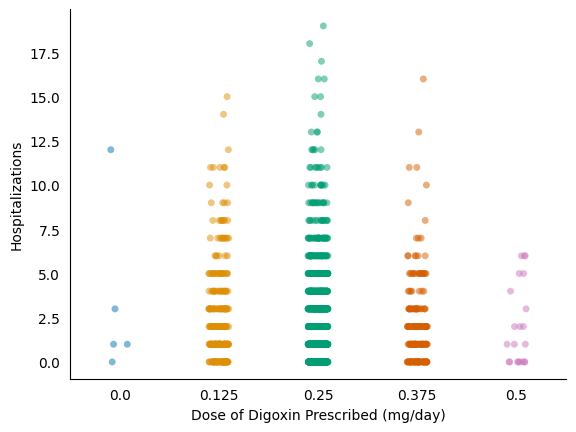

In [ ]:
import matplotlib.pyplot as plt #import matplotlib
sns.stripplot(data=cleaned_df, x='DIGDOSE', y='NHOSP', order=['0.0', '0.125', '0.25', '0.375', '0.5'], palette='colorblind', alpha=0.5, legend=False) #create a strip plot using a colorblind-friendly palette, better transparency for visibility and no legend
sns.despine() #removes the top and right spines
plt.tick_params(left= False, bottom= False) #remove tick marks
plt.xlabel('Dose of Digoxin Prescribed (mg/day)') #label for the x-axis
plt.ylabel('Hospitalizations') #label for the y-axis
plt.savefig('Figure1.pdf', format='pdf', bbox_inches='tight') #save with tight bounding plot in PDF format

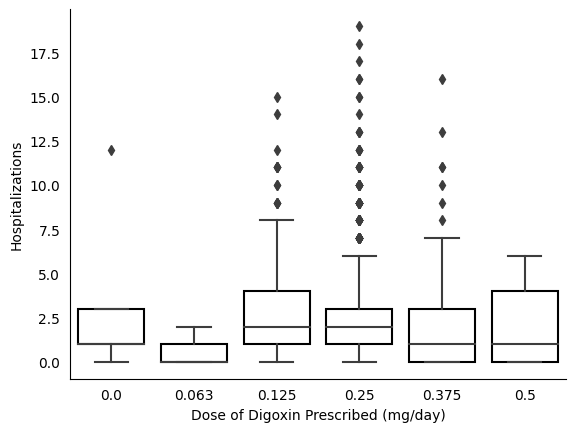

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(data=cleaned_df, x='DIGDOSE', y='NHOSP', boxprops={'edgecolor': 'black', 'facecolor': (1, 1, 1, 0)})
sns.despine()
plt.tick_params(left= False, bottom= False)
plt.xlabel('Dose of Digoxin Prescribed (mg/day)')
plt.ylabel('Hospitalizations')
plt.savefig('Figure2.pdf', format='pdf', bbox_inches='tight')

###**Statistical Analysis**

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1L4aScG_IYBOnCCgtjJ1yLKUhi6n68YGP')
countMatrix = pd.crosstab(df['DIABETES_AND_HYPERTEN'], df['CVD'], margins=True) # Create a count matrix
print(countMatrix)

CVD                       0     1   All
DIABETES_AND_HYPERTEN                  
0                      2487  2715  5202
1                       380   403   783
All                    2867  3118  5985


In [ ]:
prob_matrix = countMatrix.copy()# Copy the countMatrix to prob_matrix to avoid modifying the original countMatrix
total_patients = countMatrix.iloc[len(countMatrix.index) - 1, len(countMatrix.columns) - 1] # Calculate the total number of patients
prob_matrix = prob_matrix.iloc[0:len(prob_matrix.index) - 1, 0:len(prob_matrix.columns) - 1] / total_patients # Divide each cell in the count matrix by the total number of patients to get probabilities
print(prob_matrix)


CVD                           0         1
DIABETES_AND_HYPERTEN                    
0                      0.415539  0.453634
1                      0.063492  0.067335


In [ ]:
prob_matrix.to_csv('/probabilityMatrix.csv')

###**Publication on GitHub**

In [ ]:
%%bash
rm -r sample_data

In [ ]:
%%bash
cat > .gitignore
.*
.gitignore

In [ ]:
%%bash
git init

Initialized empty Git repository in /content/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


In [ ]:
%%bash
mkdir -p content/StartingData content/Code content/Results content/Figures

In [ ]:
%%bash
touch content/README.md

In [ ]:
%%bash
touch content/StartingData/README.md

In [ ]:
%%bash
touch content/Code/README.md

In [ ]:
%%bash
touch content/Results/README.md

In [ ]:
%%bash
touch content/Figures/README.md

In [ ]:
%%bash
touch content/StartingData/DIG.csv

In [ ]:
%%bash
touch content/Code/Lab09_AdditionalStatisticsAndReview.ipynb

In [ ]:
%%bash
touch content/Results/probabilityMatrix.csv

In [ ]:
%%bash
touch content/Figures/Figure1

In [ ]:
%%bash
touch content/Figures/Figure2

To obtain the `CXPT501_Lab08_Public.ipynb` file, select `File -> Download -> Download .ipynb`.

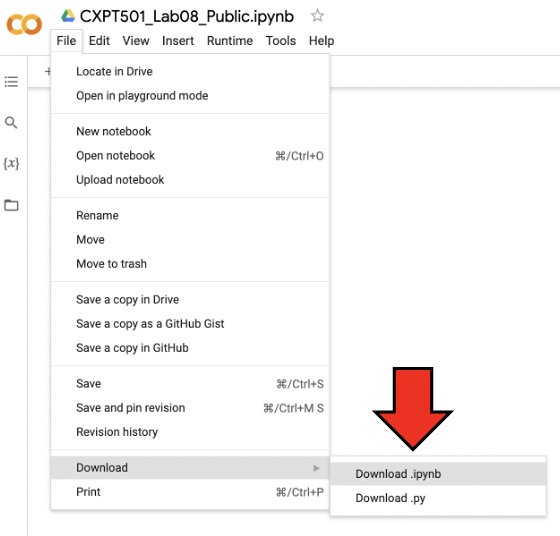

Then, you can manually upload this file to your notebook by clicking on the `Upload to session storage` button boxed in red.

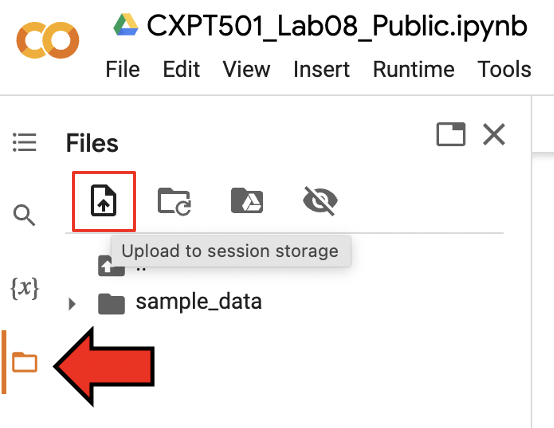

##**Rubric (10 points)**

**1 points**

The copy of this notebook contains some comments annotating the steps of the analysis performed.

<font color='blue'>Grader comments: None</font>

---

**2 points**

The original DIG Data was imported as a Pandas DataFrame, NaN values were cleaned in some manner, and some outliers were removed.

<font color='blue'>Grader comments: None</font>

---

**2 points**

At least two publication ready plots were made that demonstrate usage of both customization via addition arguments and via Matplotlib Axes.

<font color='blue'>Grader comments: None</font>

---
**2 points**

One of the following biostatistical analyses were peformed:
*   Calculation of Joint, Marginal, and Conditional Probabilities in which the Probability matrix is exported as a .csv file.
*   Calculation of Sensitivity and Specificity in which a table of confusion matrix metrics was exported as a .csv file.

<font color='blue'>Grader comments: None</font>

---
**1 point**

The entire analysis was uploaded to GitHub with a structure akin to the diagram in the Instructions section.

<font color='blue'>Grader comments: None</font>

---
**1 point**

There is a README file in every directory describing all files and subdirectories with at least a short description.

<font color='blue'>Grader comments: None</font>

---
**1 point**

The public GitHub repository contains the notebook's analysis exported as an .ipynb file.

<font color='blue'>Grader comments: None</font>